In [1]:
import pandas as pd 
import numpy as np

# Project Aim

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.
The aim of this project is to clean the data and analyze the included used car listings

In [2]:
autos = pd.read_csv("autos.csv", encoding="Latin_1")
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [3]:
print(autos.shape)
print(autos.info())


(50000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  obje

The code above displays information about the autos dataset

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
autos.columns = ['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'regyear', 'gearbox', 'powerps', 'model',
       'odometer', 'regmonth', 'fueltype', 'brand',
       'damageunrepaired', 'datecreated', 'picturenum', 'postalcode',
       'lastseen'] # edited column names
autos.columns

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'regyear', 'gearbox', 'powerps', 'model', 'odometer',
       'regmonth', 'fueltype', 'brand', 'damageunrepaired', 'datecreated',
       'picturenum', 'postalcode', 'lastseen'],
      dtype='object')

In [6]:
autos.head(5) # this code displays the fisrt five row to show the modified column names

,datecrawled,name,seller,offertype,price,abtest,vehicletype,regyear,gearbox,powerps,model,odometer,regmonth,fueltype,brand,damageunrepaired,datecreated,picturenum,postalcode,lastseen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [7]:
autos.describe(include="all")

,datecrawled,name,seller,offertype,price,abtest,vehicletype,regyear,gearbox,powerps,model,odometer,regmonth,fueltype,brand,damageunrepaired,datecreated,picturenum,postalcode,lastseen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


The description of autos shows that 
1. seller type and
2. offer type have one unique candidate, 
3. number of picture column therefore both columns will be dropped

In [8]:
cols = ["seller", "offertype", "picturenum"]
autos = autos.drop(cols, axis=1)
autos

,datecrawled,name,price,abtest,vehicletype,regyear,gearbox,powerps,model,odometer,regmonth,fueltype,brand,damageunrepaired,datecreated,postalcode,lastseen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


# Exploring the price and odometer column

In [9]:
autos["price"].unique() # this code is used to investigate the column so as to make necessary modification

array(['$5,000', '$8,500', '$8,990', ..., '$385', '$22,200', '$16,995'],
      dtype=object)

In [10]:
autos["price"] = (autos["price"].str.replace("$","").str.replace(",", "").astype(int))
autos["price"]

C:\Users\HP USA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 50000, dtype: int32

In [11]:
autos["odometer"].unique() # this code is used to investigate the column so as to make necessary modification

array(['150,000km', '70,000km', '50,000km', '80,000km', '10,000km',
       '30,000km', '125,000km', '90,000km', '20,000km', '60,000km',
       '5,000km', '100,000km', '40,000km'], dtype=object)

In [12]:
autos["odometer"] = (autos["odometer"].str.replace("km","").str.replace(",", "").astype(int))
autos["odometer"]

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer, Length: 50000, dtype: int32

Both price and odometer columns are now in the string format after modification

In [13]:
autos["price"].unique().shape

(2357,)

In [14]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [15]:
autos["price"].value_counts().sort_index(ascending=True).head(15)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
Name: price, dtype: int64

In [16]:
autos["price"].value_counts().sort_index(ascending=False).head()

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
Name: price, dtype: int64

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

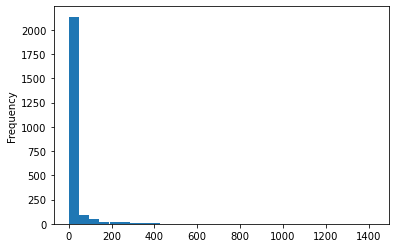

In [18]:
autos["price"].value_counts().plot.hist(bins=30)

In [19]:
autos["price"].value_counts().head(10000)

0        1421
500       781
1500      734
2500      643
1000      639
         ... 
414         1
79933       1
5198        1
18890       1
16995       1
Name: price, Length: 2357, dtype: int64

In [20]:
autos["price"].mean()

9840.04376

In [21]:
autos["price"].max()

99999999

In [22]:
autos = autos[autos["price"].between(500, 351000)]
autos

,datecrawled,name,price,abtest,vehicletype,regyear,gearbox,powerps,model,odometer,regmonth,fueltype,brand,damageunrepaired,datecreated,postalcode,lastseen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


<AxesSubplot:ylabel='Frequency'>

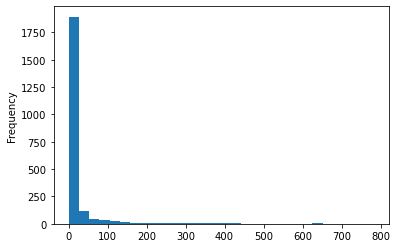

In [23]:
autos["price"].value_counts().plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

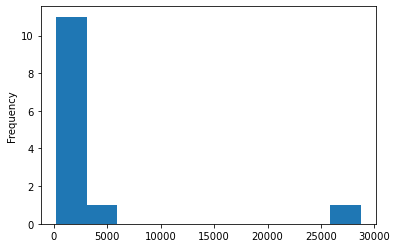

In [24]:
autos["odometer"].value_counts().plot.hist(bins=10)

In [25]:
autos["odometer"].value_counts().head(10000)

150000    28698
125000     4838
100000     2031
90000      1676
80000      1385
70000      1189
60000      1131
50000       996
40000       808
30000       765
20000       727
5000        616
10000       237
Name: odometer, dtype: int64

In [26]:
autos["odometer"].unique().shape

(13,)

There are a number of listings with prices below $30, including about 1,420 at \$0 There are also a small number of listings with very high values, including \14 at around or over \$1 million.

Since eBay is an auction site, it is possible to get items where the opening bid is $1 We will keep the $1 items, but remove anything above \$350,000


For the odometer column the values are reasonable, therefore we will just leave it like that so that our analysis will not be affected

# Exploring the date crawled, date created and last seen column

In [27]:
autos[['datecrawled','datecreated','lastseen']][0:5]

,datecrawled,datecreated,lastseen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [28]:

(autos["datecrawled"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2016-03-05    0.025567
2016-03-06    0.014125
2016-03-07    0.036189
2016-03-08    0.033173
2016-03-09    0.032907
2016-03-10    0.032707
2016-03-11    0.033018
2016-03-12    0.037320
2016-03-13    0.015522
2016-03-14    0.036300
2016-03-15    0.034016
2016-03-16    0.029359
2016-03-17    0.031155
2016-03-18    0.012883
2016-03-19    0.034747
2016-03-20    0.038073
2016-03-21    0.037741
2016-03-22    0.033018
2016-03-23    0.032397
2016-03-24    0.028982
2016-03-25    0.031089
2016-03-26    0.032641
2016-03-27    0.031177
2016-03-28    0.034836
2016-03-29    0.033262
2016-03-30    0.033328
2016-03-31    0.031665
2016-04-01    0.033905
2016-04-02    0.035767
2016-04-03    0.038827
2016-04-04    0.036610
2016-04-05    0.013172
2016-04-06    0.003171
2016-04-07    0.001353
Name: datecrawled, dtype: float64

In [29]:
(autos["datecreated"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2015-06-11    0.000022
2015-08-10    0.000022
2015-09-09    0.000022
2015-11-10    0.000022
2015-12-05    0.000022
                ...   
2016-04-03    0.039049
2016-04-04    0.036987
2016-04-05    0.011908
2016-04-06    0.003260
2016-04-07    0.001197
Name: datecreated, Length: 76, dtype: float64

In [30]:
(autos["lastseen"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2016-03-05    0.001087
2016-03-06    0.004169
2016-03-07    0.005211
2016-03-08    0.007007
2016-03-09    0.009468
2016-03-10    0.010289
2016-03-11    0.012041
2016-03-12    0.023904
2016-03-13    0.008870
2016-03-14    0.012285
2016-03-15    0.015677
2016-03-16    0.016165
2016-03-17    0.027674
2016-03-18    0.007406
2016-03-19    0.015411
2016-03-20    0.020423
2016-03-21    0.020667
2016-03-22    0.021243
2016-03-23    0.018405
2016-03-24    0.019536
2016-03-25    0.018582
2016-03-26    0.016476
2016-03-27    0.015456
2016-03-28    0.020534
2016-03-29    0.021354
2016-03-30    0.024148
2016-03-31    0.023438
2016-04-01    0.022862
2016-04-02    0.024880
2016-04-03    0.024946
2016-04-04    0.024303
2016-04-05    0.126616
2016-04-06    0.225314
2016-04-07    0.134155
Name: lastseen, dtype: float64

The analysis shows that the ads was created between 2015 and 2016, crawled in 2016 was last seen in 2016 most likely that the car was sold



In [31]:
autos["regyear"].describe()

count    45097.000000
mean      2005.064173
std         89.652017
min       1000.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: regyear, dtype: float64

This column shows extremely low and high year of registration (min=1000 and max= 9999). which is very far from the average year of registration. Moreso, 9999 is somewhere in the future. This error can be as a mistake in the data entry process. For us to achieve accurate analysis we will need to remove such excesses

In [32]:
autos["regyear"].value_counts().sort_index().head(50)

1000     1
1001     1
1910     2
1927     1
1929     1
1931     1
1934     2
1937     4
1938     1
1939     1
1941     2
1943     1
1948     1
1950     1
1951     2
1952     1
1953     1
1954     2
1955     2
1956     4
1957     2
1958     4
1959     6
1960    19
1961     6
1962     4
1963     8
1964    11
1965    17
1966    21
1967    26
1968    26
1969    19
1970    34
1971    25
1972    31
1973    23
1974    24
1975    18
1976    21
1977    22
1978    42
1979    34
1980    76
1981    27
1982    41
1983    50
1984    49
1985    85
1986    65
Name: regyear, dtype: int64

In [33]:
autos["regyear"].value_counts().sort_index(ascending=False).head(50)

9999       3
9000       1
8888       1
6200       1
5911       1
5000       2
4800       1
4500       1
4100       1
2800       1
2019       1
2018     462
2017    1296
2016     950
2015     364
2014     652
2013     797
2012    1307
2011    1617
2010    1586
2009    2078
2008    2206
2007    2270
2006    2666
2005    2864
2004    2683
2003    2657
2002    2419
2001    2520
2000    2715
1999    2572
1998    2026
1997    1512
1996    1072
1995     860
1994     500
1993     340
1992     305
1991     293
1990     274
1989     155
1988     129
1987      68
1986      65
1985      85
1984      49
1983      50
1982      41
1981      27
1980      76
Name: regyear, dtype: int64

The result of the analysis shows that most of the registered cars in the the list falls in the 2000s thhough we have  reasonable amount in the 1900s. we will base our analysis on thos between the range of 1900 - 2016. we will need to remove cars registered outside 2016.


Below is the counts of the number of car listings that fall outside the 1900 - 2016 interval to ensure that it is safe to remove those rows entirely, or if we need more investigation.


In [34]:
(~autos["regyear"].between(1900,2016)).sum() / autos.shape[0]

0.039337428210302235

The result shows that less than 4% of the car listing fll outside 1900 - 2016. Removing it will not have much effect on the analysis

In [35]:
autos = autos[autos["regyear"].between(1900,2016)]
autos

,datecrawled,name,price,abtest,vehicletype,regyear,gearbox,powerps,model,odometer,regmonth,fueltype,brand,damageunrepaired,datecreated,postalcode,lastseen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


In [36]:
autos["regyear"].value_counts(normalize=True).head(10)

2005    0.066108
2000    0.062669
2004    0.061930
2006    0.061538
2003    0.061330
1999    0.059368
2001    0.058168
2002    0.055836
2007    0.052397
2008    0.050920
Name: regyear, dtype: float64

# Expoloring the brand column

In [37]:
autos["brand"].unique() # adding .shape will give the total number of unique brand

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'renault', 'audi', 'sonstige_autos', 'mazda', 'porsche', 'mini',
       'mercedes_benz', 'seat', 'toyota', 'opel', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'jaguar', 'fiat', 'skoda', 'subaru',
       'kia', 'citroen', 'mitsubishi', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [38]:
brandfreq  = autos["brand"].value_counts(normalize=True).sort_index(ascending=False) 
brandfreq 

volvo             0.009371
volkswagen        0.211897
trabant           0.001108
toyota            0.013411
suzuki            0.005909
subaru            0.001985
sonstige_autos    0.009695
smart             0.015119
skoda             0.017150
seat              0.017889
saab              0.001662
rover             0.001246
renault           0.043903
porsche           0.006417
peugeot           0.029361
opel              0.100339
nissan            0.015004
mitsubishi        0.007733
mini              0.009371
mercedes_benz     0.102255
mazda             0.015004
land_rover        0.002262
lancia            0.000993
lada              0.000600
kia               0.007340
jeep              0.002447
jaguar            0.001616
hyundai           0.010156
honda             0.007802
ford              0.065162
fiat              0.023521
daihatsu          0.002170
daewoo            0.001339
dacia             0.002839
citroen           0.014150
chrysler          0.003601
chevrolet         0.006025
b

In [39]:
mostpopula = brandfreq[brandfreq  > .05].index
mostpopula

Index(['volkswagen', 'opel', 'mercedes_benz', 'ford', 'bmw', 'audi'], dtype='object')

In [40]:
topmost = {}
for brand in mostpopula:
    select = autos[autos["brand"] == brand]
    average = int(select["price"].mean())
    topmost[brand] = average


We observed that in the top 6 brands, there's a distinct price gap.

1. Audi, BMW and Mercedes Benz are more expensive
2. Ford and Opel are less expensive
3. Volkswagen is in between

# Exploring the mileage column for topmost brands


In [41]:
autos["odometer"].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000,  40000, 100000])

In [42]:
topmileage = {} 
for brand in mostpopula:
    selects = autos[autos["brand"] == brand]
    averages = int(selects["odometer"].mean())
    topmileage[brand] = averages
topmileage

{'volkswagen': 128234,
 'opel': 128012,
 'mercedes_benz': 131019,
 'ford': 123494,
 'bmw': 132865,
 'audi': 128909}

In [43]:
topmostprice = pd.Series(topmost)
topmostprice

volkswagen       5783
opel             3394
mercedes_benz    8766
ford             4291
bmw              8582
audi             9613
dtype: int64

In [44]:
topmostprices = pd.DataFrame(topmostprice, columns=["price"])
topmostprices

,price
volkswagen,5783
opel,3394
mercedes_benz,8766
ford,4291
bmw,8582
audi,9613


In [45]:
topmileage = pd.Series(topmileage)
topmileage

volkswagen       128234
opel             128012
mercedes_benz    131019
ford             123494
bmw              132865
audi             128909
dtype: int64

In [46]:
topmileages = pd.DataFrame(topmileage, columns=["odometer"])
topmileages

,odometer
volkswagen,128234
opel,128012
mercedes_benz,131019
ford,123494
bmw,132865
audi,128909


In [47]:
topmostprices["topmileage"] = topmileage
topmostprices["topmileage"]


volkswagen       128234
opel             128012
mercedes_benz    131019
ford             123494
bmw              132865
audi             128909
Name: topmileage, dtype: int64

In [48]:
topmostprices

,price,topmileage
volkswagen,5783,128234
opel,3394,128012
mercedes_benz,8766,131019
ford,4291,123494
bmw,8582,132865
audi,9613,128909


<AxesSubplot:xlabel='price', ylabel='topmileage'>

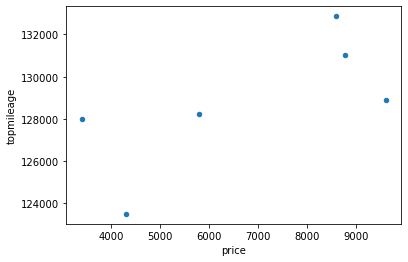

In [49]:
topmostprices.plot.scatter("price", "topmileage")

# Conclusion 

The result from the scatter plot shows that there is no strong correlation between the price and mileage of the car brands

The range of car mileages does not correlate as much as the prices do by brand, instead all falling within 10% for the top brands. Another observation is that expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.